In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

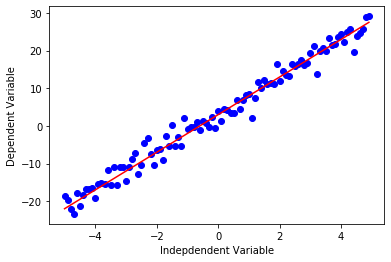

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = 5*(x) + 3
y_noise = 2 * np.random.normal(size = x.size)#so i guess this creates an array of same size, this operation applies to ee
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

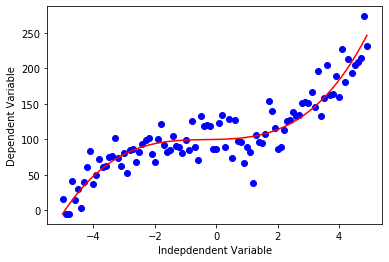

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 100
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

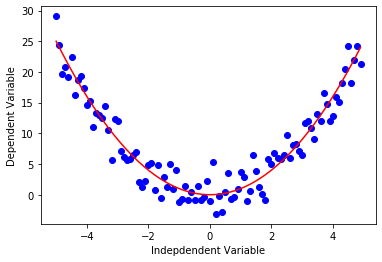

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = x**2
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

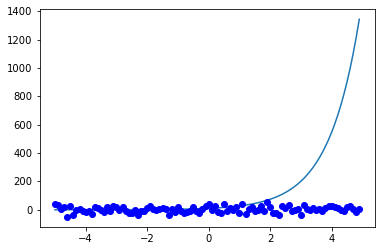

In [15]:
x = np.arange(-5.0,5.0,0.1)

y = 10*np.exp(x)
y_noise = 20 * np.random.normal(size = x.size)
y_data = y+y_noise
plt.plot(x,y)
plt.plot(x,y_noise, 'bo')
plt.show()

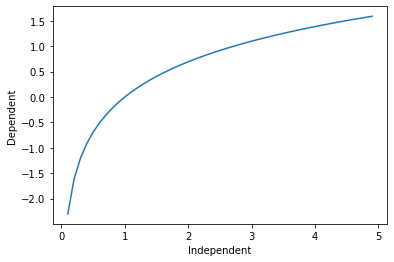

In [21]:
x = np.arange(0.1,5.0,0.1)

y = np.log(x)
plt.plot(x,y)
plt.ylabel("Dependent")
plt.xlabel("Independent")
plt.show()

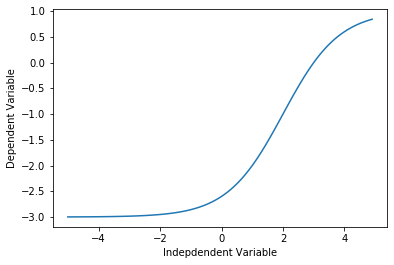

In [23]:
X = np.arange(-5.0, 5.0, 0.1)
#aka covid curve

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [26]:
import numpy as np
import pandas as pd
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-05-29 04:48:30 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


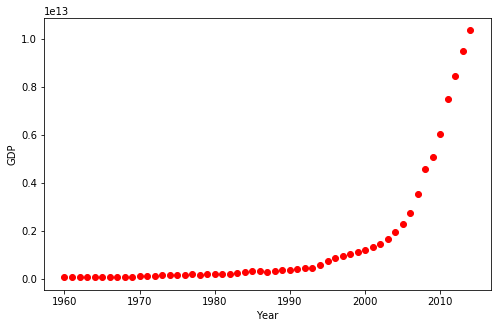

In [35]:
plt.figure(figsize = (8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
#whats up with the .values? It returns a list of the values in the column
plt.plot(x_data, y_data, 'ro')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()
#as you can see, exponential

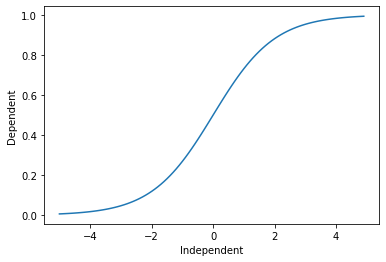

In [37]:
X = np.arange(-5.0,5.0, 0.1)
Y = 1.0/(1.0 + np.exp(-X))
plt.plot(X,Y)
plt.ylabel('Dependent')
plt.xlabel('Independent')
plt.show()
#The ideal logistic curve. How beautiful

In [38]:
#Building the logistic/Sigmoid model which we think fits the data
#A sigmoid function, with constants as params.
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

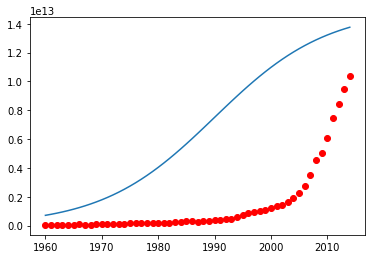

In [44]:
beta_1 = 0.10
beta_2 = 1990.0
#Just some abitrary fit for the data

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

#We want a better way to find the best parameters for our model, so we use machine learning!
#Normalize*** our data!

#EPIPHANY MOMENT
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)
#OHHH I see it! Normalizing so that no value is greater than 1, using the largest value as our limit!


beta_1 = 690.447527, beta_2 = 0.997207


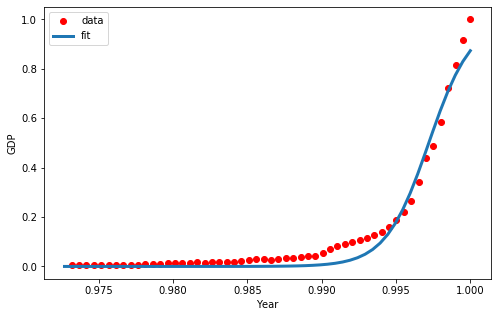

In [80]:
from scipy.optimize import curve_fit
#we use curve fit to find best parameters!takes in our function and data
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#curve_fit is our magical black box that does the fitting for us
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

#plotting regression model
x = np.linspace(1960, 2015, 55) #review linespace. lol matlab
x = x/max(x) #normalizing?

plt.figure(figsize= (8,5))
y = sigmoid(x,popt[0],popt[1])#*popt) #whats with the *? Ohhh, it's passing in the beta params from our curve_fit
plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x, y, linewidth = 3.0, label = 'fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()



In [84]:
from sklearn.metrics import r2_score
#split data into test and train
msk = np.random.rand(len(df)) < 0.8#still gotta understand this weirdness.(I mean not hard to implement yourself though)
train_year = xdata[msk]
train_values =ydata[msk]
test_year = xdata[~msk]
test_values = ydata[~msk]

#just using training data to fit
popt, pcov = curve_fit(sigmoid, train_year, train_values)

pred = sigmoid(test_year, *popt)#our curve with parameters calcualted by above
actual = test_values

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((actual- pred) ** 2))
print("R2-score: %.2f" % r2_score(pred , actual) )


Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.97


In [82]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97
